In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
import os
import time
from datetime import datetime
from matplotlib import pyplot

In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow.")

import tensorflow as tf
print("\nTensorFlow version: ", tf.__version__)
print("\nIs GPU available?", tf.test.is_gpu_available())
print("\nNum GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("\nPhysical Devices: ", tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print("\nLocal devices:", device_lib.list_local_devices())

Default GPU Device: /device:GPU:0

TensorFlow version:  2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

Is GPU available? True

Num GPUs Available:  1

Physical Devices:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Local devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17214966918361962054
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4162256896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12282634956094533193
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
SEED        = 10
folder_name = 'pruned-by-label'
limit_rows  = 1000
n_cpus      = os.cpu_count()

In [4]:
print(f"Execution started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution started at 2022-03-04 00:04:29.


In [5]:
def load_csv(subset,folder=folder_name):
    if limit_rows is None:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{subset}.csv'
    else:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{int(limit_rows/1000)}k_{subset}.csv'
    
    df = pd.read_table(filepath_or_buffer=full_filename, header=None, sep=',').infer_objects().to_numpy()
    
    return df.ravel() if df.shape[1] == 1 else df

In [6]:
X_train, X_test, y_train, y_test = load_csv('X_train'), load_csv('X_test'), load_csv('y_train'), load_csv('y_test')

print('X_train',X_train.shape,'\ny_train',y_train.shape)
print('X_test',X_test.shape,'\ny_test',y_test.shape)

X_train (546, 16) 
y_train (546,)
X_test (137, 16) 
y_test (137,)


In [7]:
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=10, seed=SEED)

In [8]:
print(f"Fitting started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

clf.fit(X_train, y_train, validation_split=0.25)

print(f"Fitting finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.3979591727256775

Best val_accuracy So Far: 0.8877550959587097
Total elapsed time: 00h 07m 09s
INFO:tensorflow:Oracle triggered exit
18/18 [==============================] - 1s 8ms/step - loss: 0.8315 - accuracy: 0.6081
INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets
Fitting finished at 2022-03-04 00:11:45.


In [9]:
print(f"Evaluation started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

print(f"Results: [test loss, test acc] = {clf.evaluate(X_test, y_test)}")

print(f"Evaluation finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Evaluation started at 2022-03-04 00:11:45.
5/5 [==============================] - 0s 6ms/step - loss: 0.6638 - accuracy: 0.8175
Results: [test loss, test acc] = [0.6638274788856506, 0.8175182342529297]
Evaluation finished at 2022-03-04 00:11:46.


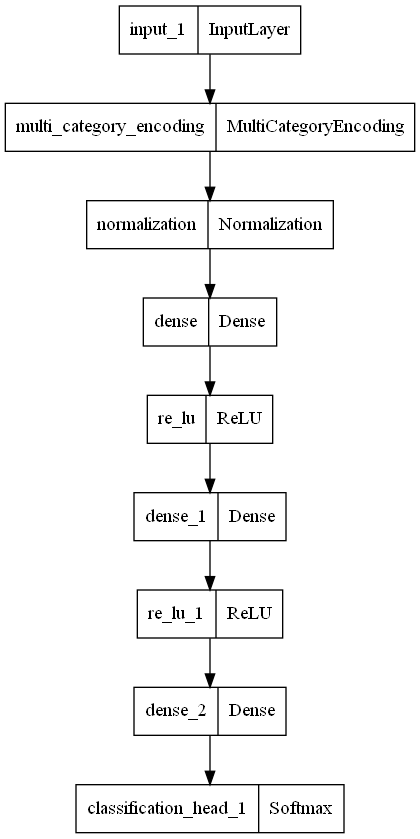

In [10]:
tf.keras.utils.plot_model(clf.export_model())

In [11]:
print(f"Execution finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution finished at 2022-03-04 00:11:47.
